<a href="https://colab.research.google.com/github/shivammehta007/NLPResearch/blob/master/Tutorials/PyTorch_Tutorial/DeepNNTutorialCoursera/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2

In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
torch.manual_seed(1)

In [0]:
w = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

In [0]:
def forward(x):
    return x *w + b

In [0]:
x = torch.tensor([1.0])

In [0]:
yhat = forward(x)

In [6]:
yhat

tensor([3.], grad_fn=<AddBackward0>)

In [0]:
model = nn.Linear(in_features=1, out_features=1)

In [0]:
y = model(x)

In [12]:
list(model.parameters())

[Parameter containing:
 tensor([[0.5935]], requires_grad=True), Parameter containing:
 tensor([-0.1612], requires_grad=True)]

In [0]:
x = torch.tensor([0.0])

In [0]:
y_hat = model(x)

In [15]:
y_hat

tensor([-0.1612], grad_fn=<AddBackward0>)

In [0]:
x = torch.tensor([[1.0], [2.0]])

In [19]:
model(x)

tensor([[0.4324],
        [1.0259]], grad_fn=<AddmmBackward>)

# Simple Linear Regression

In [0]:
class LR(nn.Module):

    def __init__(self, in_size, out_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(in_size, out_size)

    def forward(self, x):
        return self.linear(x)


In [0]:
model = LR(1,1)
y_hat = model(torch.tensor([1.0]))

In [32]:
model.state_dict()['linear.bias'].data[0], model.state_dict()['linear.weight'].data[0]

(tensor(-0.4414), tensor([0.5153]))

In [34]:
list(model.parameters())

[Parameter containing:
 tensor([[0.5153]], requires_grad=True), Parameter containing:
 tensor([-0.4414], requires_grad=True)]

In [37]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[-0.1939]])),
             ('linear.bias', tensor([0.4694]))])

# Custom Simple Linear Regression

In [0]:
w = torch.tensor(-10.0, requires_grad=True)
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

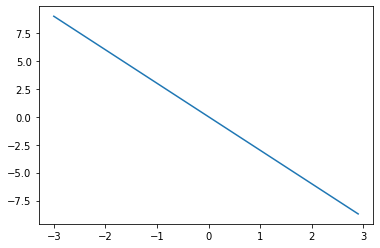

In [48]:
plt.plot(X.numpy(), f.numpy())
plt.show()

In [0]:
noise = f + 0.1 * torch.randn(X.size())

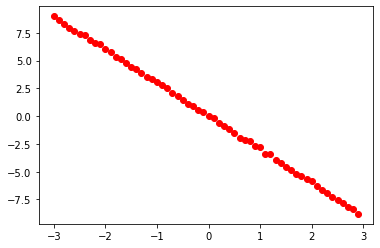

In [50]:
plt.plot(X.numpy(), noise.numpy(), 'ro')
plt.show()

In [0]:
def forward(x):
    return w*x

def criterion(y_hat, y):
    return torch.mean((y_hat - y)**2)

In [0]:
lr = 0.1
COST = []

for epoch in range(4):
    y_hat = forward(X)
    loss = criterion(y_hat, noise)
    loss.backward()
    w.data = w.data - lr * w.grad.data
    w.grad.data.zero_()
    COST.append(loss.item())
    plt.plot(X.numpy(), )


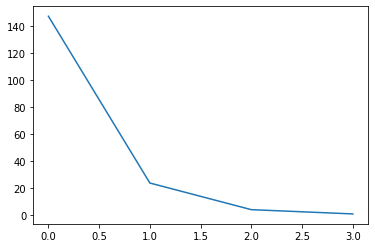

In [56]:
plt.plot(COST)
plt.show()

# Stochastic Gradient Descent

In [0]:
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)

In [0]:
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3*X

In [0]:
Y = f + 0.1 * torch.randn(X.size())

In [0]:
def forward(x):
    return w*x + b

def criterion(y_hat, y):
    return torch.mean((y_hat - y)**2)

In [0]:
lr = 0.1
LOSS = []
for epoch in range(4):
    total = 0
    for x, y in zip(X, Y):
        yhat = forward(x)
        loss = criterion(yhat, Y)
        loss.backward()
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()
        total += loss.item()
    
    LOSS.append(total)

In [74]:
w.item(), b.item()

(0.3253627419471741, -0.8065991997718811)

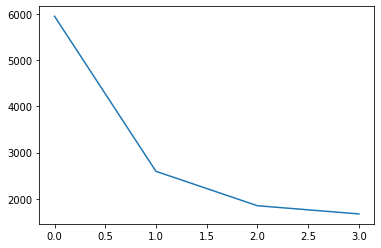

In [72]:
plt.plot(LOSS)
plt.show()

# Using DataLoader

In [0]:
from torch.utils.data import Dataset

In [0]:
class Data(Dataset):

    def __init__(self):
        self.X = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = 3 * X + 1
        self.len = self.X.shape[0]
    
    def __getitem__(self, index):
        return self.X[index], self.y[index]

    def __len__(self):
        return self.len

In [0]:
data = Data()

In [78]:
len(data)

60

In [0]:
from torch.utils.data import DataLoader

In [0]:
dataloader = DataLoader(dataset=data, batch_size=4)

In [0]:
# for i in dataloader:
#     print(i)

In [0]:
lr = 0.1
LOSS = []
for epoch in range(4):
    total = 0
    for x, y in dataloader:
        yhat = forward(x)
        loss = criterion(yhat, y)
        loss.backward()
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()
    
        LOSS.append(loss.item())

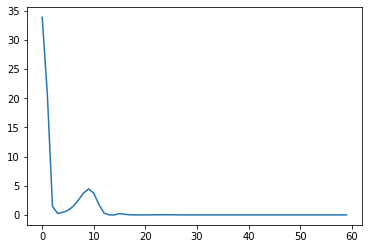

In [89]:
plt.plot(LOSS)
plt.show()

# Optimizers

In [0]:
criterion = nn.MSELoss()

In [0]:
import torch.optim as optim

In [0]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [94]:
optimizer.state_dict()

{'param_groups': [{'dampening': 0,
   'lr': 0.01,
   'momentum': 0,
   'nesterov': False,
   'params': [140473258783008, 140473258783440],
   'weight_decay': 0}],
 'state': {}}